# 1.0 Introdução

Este documento tem como objetivo fornecer um guia para a criação de uma solução que utiliza técnicas de aprendizado de máquina para analisar dados de vibração e temperatura em um equipamento industrial. O objetivo da solução é detectar anomalias e prever possíveis falhas no equipamento, permitindo a manutenção preventiva e reduzindo os custos de parada de produção. O projeto inclui a geração de dados de simulação de vibração e temperatura, a criação de recursos relevantes e a construção de modelos de aprendizado de máquina para classificação. A solução tem como objetivo ajudar as empresas a melhorar a eficiência e a confiabilidade de seus equipamentos, minimizando o tempo de inatividade e maximizando a produção.

# 1.1 Gerador de dados

Este código tem como objetivo gerar dados sintéticos de vibração e temperatura, criar recursos a partir desses dados e gerar um dataframe com esses recursos.

Primeiramente, são definidos dois parâmetros para a geração de dados de vibração: o número de amostras (N_SAMPLES) e o número de eixos de vibração (N_FEATURES). Em seguida, é criada uma lista chamada "vibration_data" que armazenará os dados de vibração gerados.

Para gerar os dados de vibração, o código utiliza um loop for para gerar valores aleatórios para as coordenadas x, y e z de cada amostra. Além disso, em aproximadamente 5% das amostras, é adicionada uma anomalia na vibração através da multiplicação de cada coordenada por um valor aleatório entre 1,5 e 2,0. Nesses casos, o valor do alvo "is_failing" é definido como 1 para indicar que a amostra é anormal. Caso contrário, "is_failing" é definido como 0.

Em seguida, é criada outra lista chamada "vibration_magnitude" que armazena a magnitude da vibração para cada amostra. Isso é feito através do cálculo da raiz quadrada da soma dos quadrados das coordenadas x, y e z.

Além disso, é criada uma lista chamada "temperature_data" que armazena valores aleatórios de temperatura para cada amostra.

Por fim, são criados nove recursos a partir dos dados de vibração e temperatura, e adicionados à lista "features". Esses recursos são:

Soma dos valores de vibração em três eixos
Temperatura
Média dos valores de vibração em três eixos
Máximo dos valores de vibração em três eixos
Diferença entre a maior e a menor vibração em três eixos
Vibração no eixo x
Vibração no eixo y
Vibração no eixo z
Atributo alvo "is_failing"
Por fim, é criado um dataframe com os recursos gerados, com colunas nomeadas de acordo com o nome dos recursos. Além disso, é adicionada uma coluna chamada "vibration_magnitude", que contém os valores de magnitude de vibração previamente calculados.

In [23]:
import random
import numpy as np
import pandas as pd

# Parâmetros de geração de dados
N_SAMPLES = 10000
N_FEATURES = 8 

# Gerando dados de vibração
vibration_data = []
for i in range(N_SAMPLES):
    x, y, z = [random.uniform(0, 1) for _ in range(3)]
    # Adicionando uma anomalia de 5% à vibração
    if random.random() <= 0.05:
        x *= random.uniform(1.5, 2.0)
        y *= random.uniform(1.5, 2.0)
        z *= random.uniform(1.5, 2.0)
        is_failing = 1  # Definindo o valor do alvo como 1 para dados anormais
    else:
        is_failing = 0
    vibration_data.append([x, y, z, is_failing])

# Calculando a magnitude da vibração
vibration_magnitude = []
for i in range(N_SAMPLES):
    x, y, z, is_failing = vibration_data[i]
    magnitude = np.sqrt(x**2 + y**2 + z**2)
    vibration_magnitude.append(magnitude)

# Gerando dados de temperatura
temperature_data = [random.uniform(0, 90) for _ in range(N_SAMPLES)]

# Criando recursos
features = []
for i in range(N_SAMPLES):
    # Recurso 1: soma dos valores de vibração em três eixos
    feature_1 = np.sum(vibration_data[i][:3])

    # Recurso 2: temperatura
    feature_2 = temperature_data[i]

    # Recurso 3: média dos valores de vibração em três eixos
    feature_3 = np.mean(vibration_data[i][:3])

    # Recurso 4: máximo dos valores de vibração em três eixos
    feature_4 = np.max(vibration_data[i][:3])

    # Recurso 5: diferença entre a maior e a menor vibração em três eixos
    feature_5 = np.max(vibration_data[i][:3]) - np.min(vibration_data[i][:3])

    # Recurso 6: vibração em x
    feature_6 = vibration_data[i][0]

    # Recurso 7: vibração em y
    feature_7 = vibration_data[i][1]

    # Recurso 8: vibração em z
    feature_8 = vibration_data[i][2]

    # Recurso 9: atributo alvo
    feature_9 = vibration_data[i][3]

    # Adicionando recursos à lista de recursos
    features.append(
        [
            feature_1,
            feature_2,
            feature_3,
            feature_4,
            feature_5,
            feature_6,
            feature_7,
            feature_8,
            feature_9,
        ]
    )

# Criando um dataframe com os recursos gerados e nomeando as colunas
df = pd.DataFrame(
    features,
    columns=[
        "vibration_sum",
        "temperature",
        "vibration_mean",
        "vibration_max",
        "vibration_range",
        "vibration_x",
        "vibration_y",
        "vibration_z",
        "is_failing",
    ],
)

# Adicionando a coluna da magnitude da vibração ao dataframe
df["vibration_magnitude"] = vibration_magnitude


#1.2 Feature engineering

O trecho de código abaixo tem como objetivo realizar a normalização dos recursos de um conjunto de dados e criar novas features com base em médias móveis e desvios padrão móveis. Inicialmente, é separado o atributo alvo dos recursos do conjunto de dados e os recursos são normalizados utilizando o StandardScaler do sklearn.preprocessing. Em seguida, é criado um novo DataFrame com os recursos normalizados e adicionado a coluna do atributo alvo.

A partir daí, é feito um loop em N_FEATURES para criar as novas features. São criadas as features de média móvel de 10 pontos para a temperatura e de média móvel de 3 pontos para a magnitude da vibração. Além disso, são criadas as features de média móvel de 5 pontos e desvio padrão móvel de 5 pontos para as vibrações em x, y e z. Por fim, são criadas as features de diferença entre a média móvel de 5 pontos da vibração em x, y e z e a vibração em x, y e z no ponto atual.

In [25]:
from sklearn.preprocessing import StandardScaler

# Separando o atributo alvo dos recursos
X = df.drop('is_failing', axis=1)
y = df['is_failing']

# Normalizando os recursos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Criando um novo DataFrame com os recursos normalizados
df_scaled = pd.DataFrame(
    data=X_scaled, 
    columns=X.columns
)

# Adicionando a coluna do atributo alvo ao DataFrame normalizado
df_scaled['is_failing'] = y

for i in range(N_FEATURES):

  # Criando uma feature com a média móvel dos últimos 10 valores da temperatura
  df_scaled["temperature_moving_avg"] = df_scaled["temperature"].rolling(window=10).mean().fillna(method='bfill')

  # Criando uma feature com a média móvel dos últimos 3 valores da magnitude da vibração
  df_scaled["vibration_magnitude_moving_avg"] = df_scaled["vibration_magnitude"].rolling(window=3).mean().fillna(method='bfill')

  # Média móvel de 5 pontos para as features de vibração em x, y e z
  df['vibration_x_rolling_mean'] = df['vibration_x'].rolling(window=5).mean()
  df['vibration_y_rolling_mean'] = df['vibration_y'].rolling(window=5).mean()
  df['vibration_z_rolling_mean'] = df['vibration_z'].rolling(window=5).mean()

  # Desvio padrão móvel de 5 pontos para as features de vibração em x, y e z
  df['vibration_x_rolling_std'] = df['vibration_x'].rolling(window=5).std()
  df['vibration_y_rolling_std'] = df['vibration_y'].rolling(window=5).std()
  df['vibration_z_rolling_std'] = df['vibration_z'].rolling(window=5).std()

  # Diferença entre a média móvel de 5 pontos da vibração em x e a vibração em x no ponto atual
  df['vibration_x_mean_diff'] = df['vibration_x_rolling_mean'] - df['vibration_x']

  # Diferença entre a média móvel de 5 pontos da vibração em y e a vibração em y no ponto atual
  df['vibration_y_mean_diff'] = df['vibration_y_rolling_mean'] - df['vibration_y']

  # Diferença entre a média móvel de 5 pontos da vibração em z e a vibração em z no ponto atual
  df['vibration_z_mean_diff'] = df['vibration_z_rolling_mean'] - df['vibration_z']


#1.3 Treinamento

Essa seção apresenta o código responsável por treinar o modelo de classificação utilizando o algoritmo Random Forest, utilizando os dados previamente divididos em conjunto de treinamento e teste na seção anterior.

Inicialmente, o código realiza o processo de divisão dos dados em conjunto de treinamento e teste utilizando a função train_test_split da biblioteca scikit-learn. A variável df_scaled corresponde aos dados de entrada normalizados, e é divida em quatro variáveis: X_train, X_test, y_train e y_test. As duas primeiras contêm os atributos de entrada (sem a coluna 'is_failing') dos conjuntos de treinamento e teste, respectivamente, enquanto as duas últimas contêm as classes correspondentes ('is_failing').

Em seguida, o código utiliza a classe RandomForestClassifier do scikit-learn para criar um modelo de classificação, utilizando 100 árvores de decisão (n_estimators=100) e um estado aleatório fixo (random_state=42). O método fit é utilizado para treinar o modelo utilizando os dados de treinamento.

Por fim, o modelo treinado é utilizado para fazer previsões (y_pred) nos dados de teste (X_test), utilizando o método predict da classe RandomForestClassifier. O resultado dessas previsões será utilizado para avaliar o desempenho do modelo na seção seguinte (#1.4).

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Split do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df_scaled.drop('is_failing', axis=1), df_scaled['is_failing'], test_size=0.2, random_state=42)

# Treinamento do modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = clf.predict(X_test)

#1.4 Avaliação

Essa seção apresenta a avaliação do modelo treinado na seção anterior, utilizando as métricas de acurácia, precisão, erro quadrático e recall, bem como a construção da matriz de confusão para avaliar o desempenho do modelo na classificação das amostras.

A matriz de confusão é criada utilizando a função confusion_matrix do módulo sklearn.metrics. A matriz é exibida em um gráfico com a função heatmap do módulo seaborn, onde cada célula da matriz é preenchida com uma cor proporcional à sua frequência relativa.

Em seguida, as métricas de avaliação do modelo são calculadas utilizando as funções correspondentes do módulo sklearn.metrics. Para imprimir essas métricas, são utilizadas as funções print e f-string para formatar a saída e fixar o número de casas decimais em 2.

Por fim, a imagem da matriz de confusão e as métricas de avaliação são exibidas.

Acurácia: 99.30%
Precision: 100.00%
Erro Quadrático: 0.70%
Recall: 84.44%


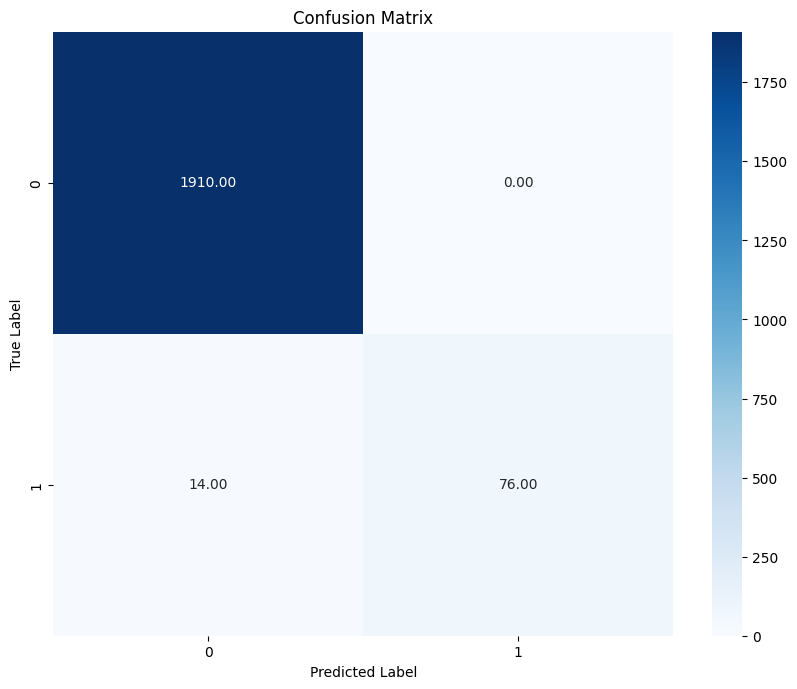

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, mean_squared_error, recall_score

# Criação da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Criação do gráfico da matriz de confusão
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', ax=ax)

# Configurações do gráfico
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')


# Cálculo das métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rec = recall_score(y_test, y_pred)

# Impressão das métricas
print(f"Acurácia: {acc*100:.2f}%")
print(f"Precision: {prec*100:.2f}%")
print(f"Erro Quadrático: {mse*100:.2f}%")
print(f"Recall: {rec*100:.2f}%")

plt.show()